In [ ]:
import numpy as np
import pandas as pd 
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Activation
from keras.optimizers import Optimizer
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical 
from keras import backend as K
import keras
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.preprocessing import Normalizer
from numpy import reshape
from tensorflow.keras import backend
from keras.models import Model
from keras.layers import Dense, Input
from keras.regularizers import l1 , l2, l1_l2 
from keras.optimizers import Adam
from keras.losses import kullback_leibler_divergence
from keras.losses import mean_squared_error
from keras.models import Sequential 
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder
from pandas import read_csv
import pandas as pd
from pandas import set_option
import math
import time
import numpy as np
from numpy import set_printoptions
from keras.models import Model
from keras.layers import Dense, Input
from keras.regularizers import l1 
from keras.optimizers import Adam
from keras.losses import kullback_leibler_divergence
from keras.losses import mean_squared_error
from keras.models import Sequential 
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE , chi2
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from scipy.stats import uniform
from matplotlib import pyplot
import tensorflow as tf 
import random as python_random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Read the data set 
filename1 = 'adult.data'
filename2 = 'adult.test'
names = ('age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class')
sample_train = pd.read_csv(filename1,names= names, na_values=[' ?','?'])
sample_test = pd.read_csv(filename2, names= names, na_values=[' ?','?'])

In [ ]:
# To see the shape of the  train dataset
sample_train.shape

(32561, 15)

In [ ]:
# To see the shape of the  test dataset
sample_test.shape

(16282, 15)

In [ ]:
# Here we drop the rows which has ' ?' in the test dataset
data_train = sample_train.dropna()
data_train.shape

(30162, 15)

In [ ]:
# Here we drop the rows which has ' ?' in the train dataset
data_test = sample_test.dropna()
data_test.shape

(15060, 15)

In [ ]:
data_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
data_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


In [ ]:
# Here we check if there are any '?' values in any of the features
for c in names:
  print(c)
  print(data_train[c].value_counts())


age
36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
workclass
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
fnlwgt
203488    13
113364    12
164190    12
123011    12
148995    12
          ..
34393      1
288341     1
239415     1
118352     1
229376     1
Name: fnlwgt, Length: 20263, dtype: int64
education
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
education-num
9     9840
10    6678
1

In [ ]:
for c in names:
  print(c)
  print(data_test[c].value_counts())

age
35    444
33    442
36    431
31    423
38    420
     ... 
85      2
88      2
89      1
84      1
87      1
Name: age, Length: 73, dtype: int64
workclass
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
Name: workclass, dtype: int64
fnlwgt
136986.0    9
203488.0    8
127651.0    8
120277.0    8
125892.0    8
           ..
153813.0    1
242589.0    1
227540.0    1
77143.0     1
204244.0    1
Name: fnlwgt, Length: 11913, dtype: int64
education
 HS-grad         4943
 Some-college    3221
 Bachelors       2526
 Masters          887
 Assoc-voc        652
 11th             571
 Assoc-acdm       499
 10th             403
 7th-8th          266
 Prof-school      243
 9th              221
 12th             200
 Doctorate        169
 5th-6th          161
 1st-4th           71
 Preschool         27
Name: education, dtype: int64
education-num
9.0     4943

In [ ]:
# Using Lable Encoder on train data to convert the Categorical data into Numerical data
data_train_new = data_train.apply(LabelEncoder().fit_transform)

In [ ]:
data_train_new


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,2,15471,7,11,2,12,5,4,0,0,0,37,38,0
32557,23,2,7555,11,8,2,6,0,4,1,0,0,39,38,1
32558,41,2,7377,11,8,6,0,4,4,0,0,0,39,38,0
32559,5,2,12060,11,8,4,0,3,4,1,0,0,19,38,0


In [ ]:
# Using Lable Encoder on train data to convert the Categorical data into Numerical data
data_test_new = data_test.apply(LabelEncoder().fit_transform)

In [ ]:
data_test_new

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
1,8,2,8315,1,6,4,6,3,2,1,0,0,39,37,0
2,21,2,1754,11,8,2,4,0,4,1,0,0,49,37,0
3,11,1,10750,7,11,2,10,0,4,1,0,0,39,37,1
4,27,2,4780,15,9,2,6,0,2,1,87,0,39,37,1
6,17,2,7091,0,5,4,7,1,4,1,0,0,29,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,16,2,8927,9,12,4,9,3,4,1,0,0,39,37,0
16277,22,2,7893,9,12,0,9,1,4,0,0,0,35,37,0
16279,21,2,11193,9,12,2,9,0,4,1,0,0,49,37,0
16280,27,2,1593,9,12,0,0,3,1,1,73,0,39,37,0


Splitting train data into array and using MinMaxScaler to scale the data
 & 
Splitting test data into array and using MinMaxScaler to scale the data

In [ ]:
# Training data 
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = data_train_new.values
# Seperate array into input and output
X = array[:, 0:14]
Y = array[:, 14]
scaler = MinMaxScaler(feature_range=(0, 1))
rX = scaler.fit_transform(X)


In [ ]:
# FOR Test data
array = data_test_new.values
# Seperate array into input and output
X_t = array[:, 0:14]
Y_t = array[:, 14]
scaler = MinMaxScaler(feature_range=(0, 1))
rX_t = scaler.fit_transform(X_t)

Filter Method - SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
#Select k best on train set 
selectModel = SelectKBest(score_func=chi2, k=9)
kBesttrain = selectModel.fit(rX,Y)
selectTrainFeatures = kBesttrain.transform(rX)

In [ ]:
selectTrainFeatures.shape

(30162, 9)

In [ ]:
#Select k best on test set 
kBesttest = selectModel.fit(rX_t,Y_t)
selectTestFeatures = kBesttest.transform(rX_t)

In [ ]:
selectTestFeatures.shape

(15060, 9)

Wrapper Method - Recurssive Feature Elemination (RFE)

In [ ]:
#RFE on train set
model_rfe = LogisticRegression(solver='liblinear') 
rfeModel = RFE(model_rfe, 9) 
rfeTrain = rfeModel.fit(rX,Y)
rfeTrainFeatures = rfeTrain.transform(rX)

In [ ]:
rfeTrainFeatures.shape

(30162, 9)

In [ ]:
#RFE on test set
rfeTest = rfeModel.fit(rX_t,Y_t)
rfeTestFeatures = rfeTest.transform(rX_t)

In [ ]:
rfeTestFeatures.shape

(15060, 9)

Embedded method - using ExtraTreesClassifier

In [ ]:
#ExtraTree on train set
extraTreeModel = ExtraTreesClassifier(n_estimators=9)
exTreeTrain = extraTreeModel.fit(rX, Y)
clf_model = SelectFromModel(exTreeTrain, prefit=True)
exTreeTrainFeatures = clf_model.transform(rX)

In [ ]:
exTreeTrainFeatures.shape

(30162, 7)

In [ ]:
#ExtraTree on test set
exTreeTest = extraTreeModel.fit(rX_t, Y_t)
clf_modeltest = SelectFromModel(exTreeTest, prefit=True)
exTreeTestFeatures = clf_modeltest.transform(rX_t)

In [ ]:
exTreeTestFeatures.shape

(15060, 8)

Principal component Analysis (PCA) from the output of Filter (SelectKBest), Wrapper (RFE) & Embedded (ExtraTreesClassifier)

PCA -Filter

In [ ]:
##Principal component Analysis (PCA) from the output of Filter (SelectKBest)
pca = PCA(n_components=5, random_state = 7) 
fit_pca_train = pca.fit(selectTrainFeatures) 
pca_filter_train_features = fit_pca_train.transform(selectTrainFeatures)

In [ ]:
## On selected test feature dataset for PCA # 
fit_pca_test = pca.fit(selectTestFeatures) 
pca_filter_test_features = fit_pca_test.transform(selectTestFeatures)

In [ ]:
pca_filter_train_features.shape

(30162, 5)

In [ ]:
pca_filter_test_features.shape

(15060, 5)

PCA -Wrapper

In [ ]:
##Principal component Analysis (PCA) from the output of Wrapper (RFE) 
fit_pca_train = pca.fit(rfeTrainFeatures) 
pca_wrapper_train_features = fit_pca_train.transform(rfeTrainFeatures)
fit_pca_test = pca.fit(rfeTestFeatures) 
pca_wrapper_test_features = fit_pca_test.transform(rfeTestFeatures)

In [ ]:
pca_wrapper_train_features.shape

(30162, 5)

In [ ]:
pca_wrapper_test_features.shape

(15060, 5)

PCA - Embedded

In [ ]:
##Principal component Analysis (PCA) from the output of Wrapper (RFE) 
pca = PCA(n_components=5, random_state = 2) 
fit_pca_train = pca.fit(exTreeTrainFeatures) 
pca_embedded_train_features = fit_pca_train.transform(exTreeTrainFeatures)
fit_pca_test = pca.fit(exTreeTestFeatures) 
pca_embedded_test_features = fit_pca_test.transform(exTreeTestFeatures)

In [ ]:
pca_embedded_train_features.shape

(30162, 5)

In [ ]:
pca_embedded_test_features.shape

(15060, 5)

###Using Neural Network Model on the PCA output

Training with PCA - FILTER METHOD output "pca_filter_train_features " 

In [ ]:
optimizers = ['adam', 'rmsprop']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model1(optimizer=optimizers, init=inits):
  # creatoe model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 
  mlp_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model1, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_filter_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.808335 using {'batch_size': 30, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}


Training with PCA - WRPPER METHOD output "pca_wrapper_filter_features"



In [ ]:
optimizers = ['adam', 'rmsprop']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model3(optimizer=optimizers, init=inits):
  # creatoe model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 
  mlp_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model3, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_wrapper_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.827134 using {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'optimizer': 'adam'}


Training with PCA - EMBEDDED METHOD output "pca_embedded_train_features"

In [ ]:
optimizers = ['adam', 'rmsprop']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model4(optimizer=optimizers, init=inits):
  # creatoe model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 
  mlp_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))


  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model4, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_embedded_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.815894 using {'batch_size': 30, 'epochs': 10, 'init': 'uniform', 'optimizer': 'rmsprop'}


###Creating WAME algorithm  with changing Learning Rate  so we create WAME1, WAME2, WAME3, WAME4 

In [ ]:
class WAME1(Optimizer):
 
   def __init__(self, learning_rate=0.001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME1, self).__init__(**kwargs)
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): # everything betweem 4 and 12
                                       # "the for loop in the paper"
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
       # 4
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g #4 & 6
           change_below_zero = K.less(change,0.) #true or false
           change_above_zero = K.greater(change,0.) #true or false
           zeeta = K.switch(
               change_below_zero, # if we jump to line 6
               a * self.eta_minus, # use line 7
               K.switch(change_above_zero,  # if line 4 if true
                        a * self.eta_plus, # line 5 
                        a) # otheriwse leave a as it was
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) #end of line 5 and 7 (min and max)
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) #9
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped #10
           a_rate = a_clipped / am_t #am_t == θij(t) # 11
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) #12
 
           new_p = p_t
 
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME1, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


In [ ]:
class WAME2(Optimizer):
 
   def __init__(self, learning_rate=0.0001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME2, self).__init__(**kwargs)
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): # everything betweem 4 and 12
                                       # "the for loop in the paper"
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
       # 4
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g #4 & 6
           change_below_zero = K.less(change,0.) #true or false
           change_above_zero = K.greater(change,0.) #true or false
           zeeta = K.switch(
               change_below_zero, # if we jump to line 6
               a * self.eta_minus, # use line 7
               K.switch(change_above_zero,  # if line 4 if true
                        a * self.eta_plus, # line 5 
                        a) # otheriwse leave a as it was
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) #end of line 5 and 7 (min and max)
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) #9
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped #10
           a_rate = a_clipped / am_t #am_t == θij(t) # 11
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) #12
 
           new_p = p_t
 
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME2, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


In [ ]:
class WAME3(Optimizer):
 
   def __init__(self, learning_rate=0.00001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME3, self).__init__(**kwargs)
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): # everything betweem 4 and 12
                                       # "the for loop in the paper"
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
       # 4
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g #4 & 6
           change_below_zero = K.less(change,0.) #true or false
           change_above_zero = K.greater(change,0.) #true or false
           zeeta = K.switch(
               change_below_zero, # if we jump to line 6
               a * self.eta_minus, # use line 7
               K.switch(change_above_zero,  # if line 4 if true
                        a * self.eta_plus, # line 5 
                        a) # otheriwse leave a as it was
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) #end of line 5 and 7 (min and max)
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) #9
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped #10
           a_rate = a_clipped / am_t #am_t == θij(t) # 11
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) #12
 
           new_p = p_t
 
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME3, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


In [ ]:
class WAME4(Optimizer):
 
   def __init__(self, learning_rate=0.000001, alpha = 0.9,
                epsilon=1e-11, decay=0., eta_plus = 1.2, eta_minus = 0.1,
                zeta_min=1e-2, zeta_max=1e2, zeta = 0, eta = 0,
                **kwargs):
      
       super(WAME4, self).__init__(**kwargs)
       self.__dict__.update(locals())
       self.iterations = K.variable(0)
       self.learning_rate = K.variable(learning_rate)
       self.alpha = K.variable(alpha)
       self.zeta = K.variable(zeta)
       self.decay = K.variable(decay)
       self.eta_plus = K.variable(eta_plus)
       self.eta_minus = K.variable(eta_minus)
       self.eta_min = eta_min
       self.eta_max = eta_max
       self.inital_decay = decay
   
   def get_updates(self, params, loss): # everything betweem 4 and 12
                                       # "the for loop in the paper"
 
       grads = self.get_gradients(loss, params)
       self.updates = [K.update_add(self.iterations, 1)]
       # 4
       lr = self.learning_rate
       if self.inital_decay > 0:
           lr *= (1. / (1. + self.decay * self.iterations))
 
       t = self.iterations + 1
 
       shapes = [K.int_shape(p) for p in params]
       prev_grads = [K.zeros(shape) for shape in shapes]
       prev_param = [K.zeros(shape) for shape in shapes]
       ms = [K.zeros(shape) for shape in shapes]
       vs = [K.zeros(shape) for shape in shapes]
       accs = [K.ones(shape) for shape in shapes]
       acc_ms = [K.ones(shape) for shape in shapes]
       acc_vs = [K.ones(shape) for shape in shapes]
       self.weights = [self.iterations] + ms + vs
 
       for p, g, m, v, a, am, av, pg, pp in zip(params, grads, ms, vs, accs,
               acc_ms, acc_vs, prev_grads, prev_param):
 
           change = pg * g #4 & 6
           change_below_zero = K.less(change,0.) #true or false
           change_above_zero = K.greater(change,0.) #true or false
           zeeta = K.switch(
               change_below_zero, # if we jump to line 6
               a * self.eta_minus, # use line 7
               K.switch(change_above_zero,  # if line 4 if true
                        a * self.eta_plus, # line 5 
                        a) # otheriwse leave a as it was
             
           )
           a_clipped = K.clip(zeeta, self.eta_min, self.eta_max) #end of line 5 and 7 (min and max)
           v_t = (self.alpha * v) + (1. - self.alpha) * K.square(g) #9
           am_t = (self.alpha * am) + (1. - self.alpha) * a_clipped #10
           a_rate = a_clipped / am_t #am_t == θij(t) # 11
           p_t = p - lr * a_rate * g * (1/(K.sqrt(v_t + self.epsilon))) #12
 
           new_p = p_t
 
           self.updates.append(K.update(v, v_t))
           self.updates.append(K.update(p, new_p))
           self.updates.append(K.update(pg, p))
           self.updates.append(K.update(a, zeeta))
           self.updates.append(K.update(am, am_t))
           self.updates.append(K.update(pp, p))
       return self.updates
 
   def get_config(self):
       config = {'lr': float(K.get_value(self.lr)),
                 'alpha': float(K.get_value(self.alpha)),
                 'eta_plus': float(K.get_value(self.eta_plus)),
                 'eta_minus': float(K.get_value(self.eta_minus)),
                 'eta_min': float(self.eta_min),
                 'eta_max': float(self.eta_max),
                 'epsilon': self.epsilon}
       base_config = super(WAME4, self).get_config()
       return dict(list(base_config.items()) + list(config.items()))
 


Configering The Keras Model For Filter, Wrapper and Embedded PCA Output and Geetting the best tune results in from Grid search CV

Training with PCA - FILTER METHOD output "pca_filter_train_features " with WAME 1, 2 , 3 & 4.

In [ ]:
optimizers = ['adam', 'rmsprop', 'WAME1', 'WAME2', 'WAME3', 'WAME4']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model5(optimizer=optimizers, init=inits):
  # creatoe model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 
  mlp_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))


  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model5, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_filter_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.808700 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME1'}


Training with PCA - WRPPER METHOD output "pca_wrapper_filter_features" with WAME 1, 2, 3 & 4

In [ ]:
optimizers = ['adam', 'rmsprop', 'WAME1', 'WAME2', 'WAME3', 'WAME4']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model6(optimizer=optimizers, init=inits):
  # creatoe model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 
  mlp_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))


  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model6, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_wrapper_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.828095 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME4'}


Training with PCA - EMBEDDED METHOD output "pca_embedded_train_features" with WAME 1, 2, 3 & 4

In [ ]:
optimizers = ['adam', 'rmsprop', 'WAME1', 'WAME2', 'WAME3', 'WAME4']
inits = ['uniform', 'glorot_uniform'] 
epochs = [5, 7, 10]
batches = [20, 30, 40]

def create_model7(optimizer=optimizers, init=inits):
  # creatoe model
  mlp_model = Sequential()
  mlp_model.add(Dense(12, input_dim= 5, activation='relu')) 
  mlp_model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) 
  mlp_model.add(Dense(1, activation='sigmoid',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))


  # Compile model
  mlp_model.compile(loss = tf.keras.losses.mean_squared_error, metrics=["accuracy"])
  return mlp_model

# create model
model_keras = KerasClassifier(build_fn=create_model7, verbose=0)

# grid search epochs, batch size and optimizer
param_grid = dict(optimizer= optimizers, epochs=epochs, batch_size=batches, init=inits) 
grid = GridSearchCV(estimator=model_keras, param_grid=param_grid)
grid_result = grid.fit(pca_embedded_train_features, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) 

Best: 0.817651 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}


Comparing best models (Betweent Filter, Wrapper & Embedded with WAME Output)  :

(a) Using Crossvalidation on hyperparameter tuned models of Keras Classifier (from output of Filerr, Wrapper & Embedded) and compare the performance accuracy

Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.2341 - accuracy: 0.7359
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1639 - accuracy: 0.7704
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1600 - accuracy: 0.7904
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1579 - accuracy: 0.7914
Epoch 5/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1539 - accuracy: 0.7981
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1515 - accuracy: 0.8026
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1488 - accuracy: 0.8029
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1473 - accuracy: 0.8052
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1471 - accuracy: 0.8038
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.144

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.2327 - accuracy: 0.7270
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1642 - accuracy: 0.7791
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1569 - accuracy: 0.8018
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1552 - accuracy: 0.7987
Epoch 5/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1537 - accuracy: 0.7982
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1480 - accuracy: 0.8067
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1481 - accuracy: 0.8023
Epoch 8/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1475 - accuracy: 0.8055
Epoch 9/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1435 - accuracy: 0.8080
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.144

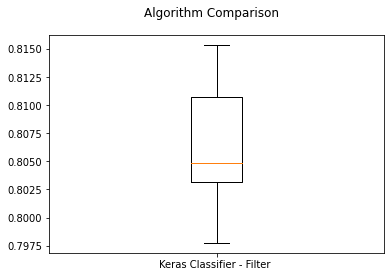

In [ ]:
# The Keras on Filter output  
# Best: 0.808700 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME1'}
models1 = []
models1.append(('Keras Classifier - Filter ', KerasClassifier(build_fn=create_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME1')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model1 in models1:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model1, pca_filter_train_features, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.2457 - accuracy: 0.7293
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1615 - accuracy: 0.8044
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1558 - accuracy: 0.8157
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1532 - accuracy: 0.8104
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1497 - accuracy: 0.8194
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1456 - accuracy: 0.8266
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1403 - accuracy: 0.8315
Epoch 8/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1437 - accuracy: 0.8238
Epoch 9/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1408 - accuracy: 0.8292
Epoch 10/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.139

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.2185 - accuracy: 0.7524
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1642 - accuracy: 0.7949
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1551 - accuracy: 0.8199
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1494 - accuracy: 0.8259
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1479 - accuracy: 0.8244
Epoch 6/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1441 - accuracy: 0.8258
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1440 - accuracy: 0.8256
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1393 - accuracy: 0.8316
Epoch 9/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1400 - accuracy: 0.8255
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.139

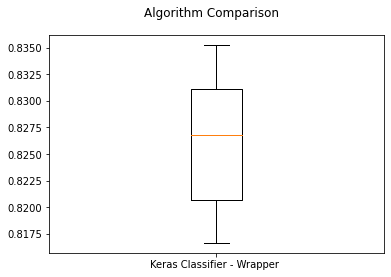

In [ ]:
# The Keras on Wrapper output
#Best: 0.828095 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'WAME4'}
models2 = []
models2.append(('Keras Classifier - Wrapper ', KerasClassifier(build_fn=create_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME4')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model2 in models2:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model2, pca_wrapper_train_features, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.2341 - accuracy: 0.7454
Epoch 2/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1693 - accuracy: 0.7747
Epoch 3/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1604 - accuracy: 0.7947
Epoch 4/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1565 - accuracy: 0.8017
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1519 - accuracy: 0.8089
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1507 - accuracy: 0.8109
Epoch 7/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1509 - accuracy: 0.8117
Epoch 8/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1493 - accuracy: 0.8095
Epoch 9/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1483 - accuracy: 0.8098
Epoch 10/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.144

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.2327 - accuracy: 0.7513
Epoch 2/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1700 - accuracy: 0.7696
Epoch 3/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1606 - accuracy: 0.7926
Epoch 4/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1570 - accuracy: 0.8006
Epoch 5/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1545 - accuracy: 0.8037
Epoch 6/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1491 - accuracy: 0.8126
Epoch 7/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1514 - accuracy: 0.8089
Epoch 8/10
1358/1358 [==============================] - 2s 1ms/step - loss: 0.1503 - accuracy: 0.8043
Epoch 9/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.1482 - accuracy: 0.8126
Epoch 10/10
1358/1358 [==============================] - 1s 1ms/step - loss: 0.147

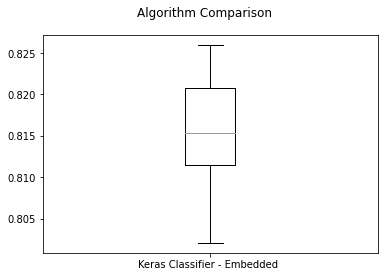

In [ ]:
# The Keras on Embedded Method
#Best: 0.817651 using {'batch_size': 20, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}
models3 = []
models3.append(('Keras Classifier - Embedded ', KerasClassifier(build_fn=create_model7, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='adam')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model3 in models3:
  kfold = KFold(n_splits=10, random_state=7,shuffle=True)
  cv_results = cross_val_score(model3, pca_embedded_train_features, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

b) Predicting labels of test data instances and evaluating model based on :

(i) Time taken to build model

(ii) Time taken to test model

(iii) Model Accuracy

(iv) Model Error Rate

(v) DetectionRate

(vi) False Positive

(vii) Type II Error

(viii) Matthews correlation coefficient (MCC)

In [ ]:
# Predicting of Test data of Filter method 
models = []
models.append(('Keras Classifier - Filter', KerasClassifier(build_fn=create_model5, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME1')))


for name, model in models:
  print("-----------------------------------------------")
  print("Model : ", name)
  model_start = time.time()
  model.fit(pca_filter_train_features, Y)
  print("Time to build model (sec) : %.4f " % round(time.time()-model_start,4))
  start = time.time()
  predicted = model.predict(pca_filter_test_features)
  print("Time to test model (sec) : %.4f " % round(time.time()-start,4))
  matrix = confusion_matrix(Y_t, predicted)
  print("Time elapsed (sec): %.4f " % round(time.time()-model_start, 4))
  print(matrix)

  TN1 = matrix[0][0]
  FN1 = matrix[1][0]
  FP1 = matrix[0][1]
  TP1 = matrix[1][1]

  DetectionRate_LR = TP1/(TP1+FN1)
  Alarm_LR =   FP1/(FP1+TN1)

  # To built a MCC for LR
  MCC_num_LR= (TP1*TN1)-(FP1*FN1) 
  MCC_din_LR= math.sqrt((TP1 + FP1)*(TP1+FN1)*(TN1 + FP1)*(TN1+FN1))

  MCC_LR = MCC_num_LR / MCC_din_LR
  Acc_LR = (TP1 + TN1) / (TP1+FP1+FN1+TN1)
  Err_LR = 1 - Acc_LR
  T2_Err = (FN1 / (FN1+TP1))
  print("Model Accuracy : %s"%(Acc_LR))
  print("Model Error Rate : %s"%(Err_LR))
  print("Detection Rate :%s"%(DetectionRate_LR))
  print("False Positive Type 1 :%s"%(Alarm_LR))
  print("Type 2 Error : %s"%(T2_Err))
  print("Matthews correlation coefficient (MCC):%s"%(MCC_LR))

-----------------------------------------------
Model :  Keras Classifier - Filter
Epoch 1/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.2341 - accuracy: 0.7492
Epoch 2/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1627 - accuracy: 0.7964
Epoch 3/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1570 - accuracy: 0.7966
Epoch 4/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1551 - accuracy: 0.7962
Epoch 5/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1494 - accuracy: 0.8039
Epoch 6/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1478 - accuracy: 0.8065
Epoch 7/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1483 - accuracy: 0.8009
Epoch 8/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1457 - accuracy: 0.8061
Epoch 9/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1429 - accuracy: 0.8112

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test model (sec) : 0.4761 
Time elapsed (sec): 18.1435 
[[10631   729]
 [ 2161  1539]]
Model Accuracy : 0.8081009296148738
Model Error Rate : 0.1918990703851262
Detection Rate :0.41594594594594597
False Positive Type 1 :0.0641725352112676
Type 2 Error : 0.5840540540540541
Matthews correlation coefficient (MCC):0.42341114652864553


In [ ]:
# Predicting of Test data of Wrapper method 
models = []
models.append(('Keras Classifier - Wrapper', KerasClassifier(build_fn=create_model6, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='WAME4')))


for name, model in models:
  print("-----------------------------------------------")
  print("Model : ", name)
  model_start = time.time()
  model.fit(pca_wrapper_train_features, Y)
  print("Time to build model (sec) : %.4f " % round(time.time()-model_start,4))
  start = time.time()
  predicted = model.predict(pca_wrapper_test_features)
  print("Time to test model (sec) : %.4f " % round(time.time()-start,4))
  matrix = confusion_matrix(Y_t, predicted)
  print("Time elapsed (sec): %.4f " % round(time.time()-model_start, 4))
  print(matrix)

  TN1 = matrix[0][0]
  FN1 = matrix[1][0]
  FP1 = matrix[0][1]
  TP1 = matrix[1][1]

  DetectionRate_LR = TP1/(TP1+FN1)
  Alarm_LR =   FP1/(FP1+TN1)

  # To built a MCC for LR
  MCC_num_LR= (TP1*TN1)-(FP1*FN1) 
  MCC_din_LR= math.sqrt((TP1 + FP1)*(TP1+FN1)*(TN1 + FP1)*(TN1+FN1))

  MCC_LR = MCC_num_LR / MCC_din_LR
  Acc_LR = (TP1 + TN1) / (TP1+FP1+FN1+TN1)
  Err_LR = 1 - Acc_LR
  T2_Err = (FN1 / (FN1+TP1))
  print("Model Accuracy : %s"%(Acc_LR))
  print("Model Error Rate : %s"%(Err_LR))
  print("Detection Rate :%s"%(DetectionRate_LR))
  print("False Positive Type 1 :%s"%(Alarm_LR))
  print("Type 2 Error : %s"%(T2_Err))
  print("Matthews correlation coefficient (MCC):%s"%(MCC_LR))

-----------------------------------------------
Model :  Keras Classifier - Wrapper
Epoch 1/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.2256 - accuracy: 0.7534
Epoch 2/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1613 - accuracy: 0.8051
Epoch 3/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1530 - accuracy: 0.8225
Epoch 4/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1511 - accuracy: 0.8188
Epoch 5/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1439 - accuracy: 0.8289
Epoch 6/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1434 - accuracy: 0.8280
Epoch 7/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1421 - accuracy: 0.8257
Epoch 8/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1404 - accuracy: 0.8286
Epoch 9/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1397 - accuracy: 0.827

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test model (sec) : 0.4686 
Time elapsed (sec): 17.7718 
[[10644   716]
 [ 1893  1807]]
Model Accuracy : 0.8267596281540505
Model Error Rate : 0.17324037184594954
Detection Rate :0.4883783783783784
False Positive Type 1 :0.0630281690140845
Type 2 Error : 0.5116216216216216
Matthews correlation coefficient (MCC):0.49032184264367223


In [ ]:
# Predicting of Test data of Embedded method 
models = []
models.append(('Keras Classifier - Embedded', KerasClassifier(build_fn=create_model7, batch_size= 20, epochs= 10, init = 'glorot_uniform', optimizer='adam')))


for name, model in models:
  print("-----------------------------------------------")
  print("Model : ", name)
  model_start = time.time()
  model.fit(pca_embedded_train_features, Y)
  print("Time to build model (sec) : %.4f " % round(time.time()-model_start,4))
  start = time.time()
  predicted = model.predict(pca_embedded_test_features)
  print("Time to test model (sec) : %.4f " % round(time.time()-start,4))
  matrix = confusion_matrix(Y_t, predicted)
  print("Time elapsed (sec): %.4f " % round(time.time()-model_start, 4))
  print(matrix)

  TN1 = matrix[0][0]
  FN1 = matrix[1][0]
  FP1 = matrix[0][1]
  TP1 = matrix[1][1]

  DetectionRate_LR = TP1/(TP1+FN1)
  Alarm_LR =   FP1/(FP1+TN1)

  # To built a MCC for LR
  MCC_num_LR= (TP1*TN1)-(FP1*FN1) 
  MCC_din_LR= math.sqrt((TP1 + FP1)*(TP1+FN1)*(TN1 + FP1)*(TN1+FN1))

  MCC_LR = MCC_num_LR / MCC_din_LR
  Acc_LR = (TP1 + TN1) / (TP1+FP1+FN1+TN1)
  Err_LR = 1 - Acc_LR
  T2_Err = (FN1 / (FN1+TP1))
  print("Model Accuracy : %s"%(Acc_LR))
  print("Model Error Rate : %s"%(Err_LR))
  print("Detection Rate :%s"%(DetectionRate_LR))
  print("False Positive Type 1 :%s"%(Alarm_LR))
  print("Type 2 Error : %s"%(T2_Err))
  print("Matthews correlation coefficient (MCC):%s"%(MCC_LR))

-----------------------------------------------
Model :  Keras Classifier - Embedded
Epoch 1/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.2352 - accuracy: 0.7770
Epoch 2/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1648 - accuracy: 0.7925
Epoch 3/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1588 - accuracy: 0.7993
Epoch 4/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1575 - accuracy: 0.7994
Epoch 5/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1523 - accuracy: 0.8074
Epoch 6/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1519 - accuracy: 0.8073
Epoch 7/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1489 - accuracy: 0.8130
Epoch 8/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1464 - accuracy: 0.8163
Epoch 9/10
1509/1509 [==============================] - 2s 1ms/step - loss: 0.1455 - accuracy: 0.81

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Time to test model (sec) : 0.4760 
Time elapsed (sec): 17.9057 
[[7899 3461]
 [1939 1761]]
Model Accuracy : 0.6414342629482072
Model Error Rate : 0.35856573705179284
Detection Rate :0.47594594594594597
False Positive Type 1 :0.3046654929577465
Type 2 Error : 0.524054054054054
Matthews correlation coefficient (MCC):0.1549265991905138
